# SALES EFFECTIVENESS

*  GOAL OF THE PROJECT:

                 *   1. Data exploration insights – Sales effectiveness.
                 *   2. ML model to predict the Lead Category (High Potential , Low Potential)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score,classification_report,precision_score, recall_score, f1_score

# LOAD THE DATA

In [2]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\sales_leads_dataset.csv")
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,01-01-2023 00:00,1051,Referral,+1-723-296-8724x626,gfrancis@gmail.com,Agent E,Houston,Online,Low Potential
1,01-01-2023 01:00,1092,Cold Call,NaN,gomeztimothy@gmail.com,Agent D,Los Angeles,Online,High Potential
2,01-01-2023 02:00,1014,Social Media,337-557-9757,stephanieorr@hotmail.com,Agent B,Houston,Online,Low Potential
3,01-01-2023 03:00,1071,Referral,-10826,ernestbyrd@yahoo.com,Agent D,San Francisco,Online,Low Potential
4,01-01-2023 04:00,1060,Referral,NaN,shannon01@gmail.com,Agent E,San Francisco,Offline,Low Potential
...,...,...,...,...,...,...,...,...,...
7417,06-11-2023 01:00,1017,Social Media,NaN,djenkins@hotmail.com,Agent E,Chicago,Online,High Potential
7418,06-11-2023 02:00,1022,Cold Call,NaN,brownjohn@wong-cooper.info,Agent B,Houston,Offline,High Potential
7419,06-11-2023 03:00,1053,Cold Call,NaN,gblack@johnson.biz,Agent B,Los Angeles,Offline,Low Potential
7420,06-11-2023 04:00,1029,Website,873-332-3351x57062,hoffmanmichael@yahoo.com,Agent D,New York,Offline,Low Potential


# BASIC CHECKS

In [3]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,01-01-2023 00:00,1051,Referral,+1-723-296-8724x626,gfrancis@gmail.com,Agent E,Houston,Online,Low Potential
1,01-01-2023 01:00,1092,Cold Call,NaN,gomeztimothy@gmail.com,Agent D,Los Angeles,Online,High Potential
2,01-01-2023 02:00,1014,Social Media,337-557-9757,stephanieorr@hotmail.com,Agent B,Houston,Online,Low Potential
3,01-01-2023 03:00,1071,Referral,-10826,ernestbyrd@yahoo.com,Agent D,San Francisco,Online,Low Potential
4,01-01-2023 04:00,1060,Referral,NaN,shannon01@gmail.com,Agent E,San Francisco,Offline,Low Potential


In [4]:
df.shape

(7422, 9)

In [5]:
df.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   int64 
 2   Source         7422 non-null   object
 3   Mobile         5221 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: int64(1), object(8)
memory usage: 522.0+ KB


In [7]:
df.describe()

,Product_ID
count,7422.000000
mean,1049.197656
std,28.869251
min,1000.000000
25%,1024.000000
50%,1049.000000
75%,1074.000000
max,1099.000000


In [8]:
# Get categorical summary
print(df.describe(include=['object']))

                 Created    Source Mobile                EMAIL Sales_Agent  \
count               7422      7422   5221                 7422        7422   
unique              7422         5   5220                 7392           5   
top     01-01-2023 00:00  Referral  -8777  anthony23@gmail.com     Agent E   
freq                   1      1534      2                    3        1617   

             Location Delivery_Mode         Status  
count            7422          7422           7422  
unique              5             2              2  
top     San Francisco       Offline  Low Potential  
freq             1524          3836           4404  


# CHECKING MISSING VALUES

In [9]:
df.isnull().sum()

Created             0
Product_ID          0
Source              0
Mobile           2201
EMAIL               0
Sales_Agent         0
Location            0
Delivery_Mode       0
Status              0
dtype: int64

In [10]:
# Categories in each column
df.nunique()

Created          7422
Product_ID        100
Source              5
Mobile           5220
EMAIL            7392
Sales_Agent         5
Location            5
Delivery_Mode       2
Status              2
dtype: int64

# Exploratory Data Analysis  (EDA)

In [11]:
df.Status.value_counts()

Status
Low Potential     4404
High Potential    3018
Name: count, dtype: int64

# Target Variable Distribution

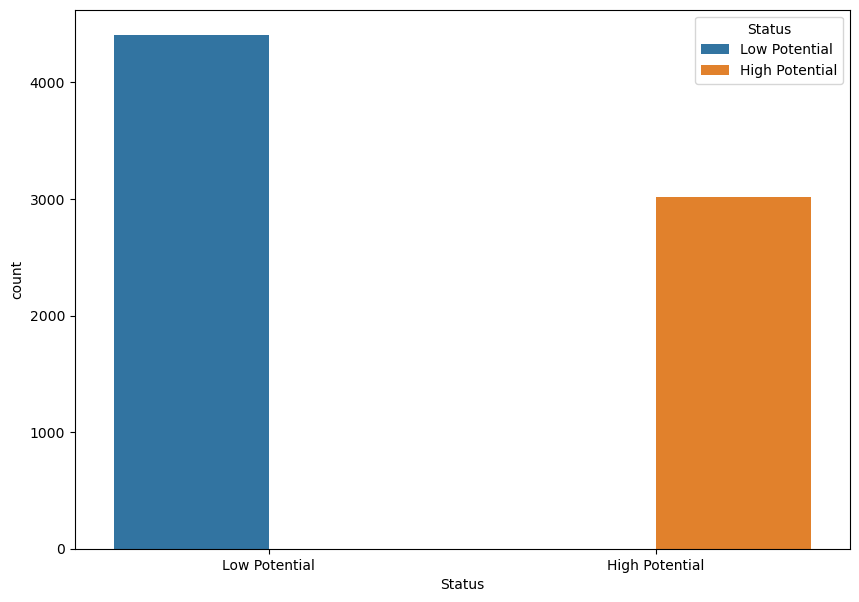

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(df,x="Status",hue="Status")
plt.show()

We have observed that , Low potential are more than high potential

# Visualizing missing values

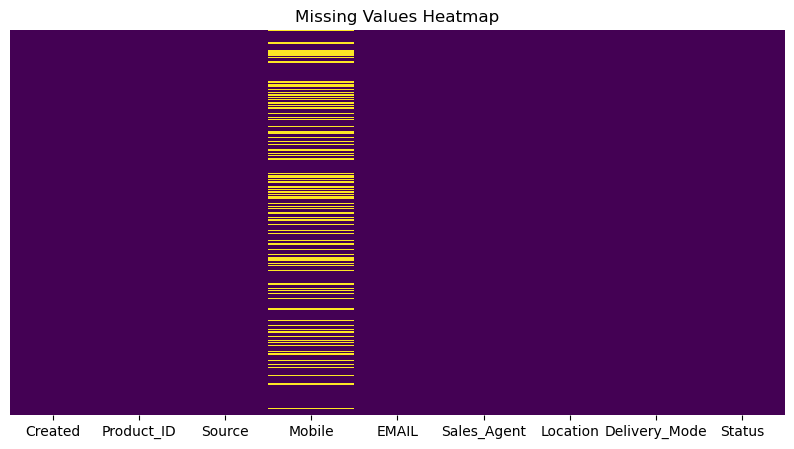

In [13]:
# Visualizing missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


We observed that Mobile number column has missing values , actually we dont need that column for the sales , So I will remove it.

# Identifying top-performer source

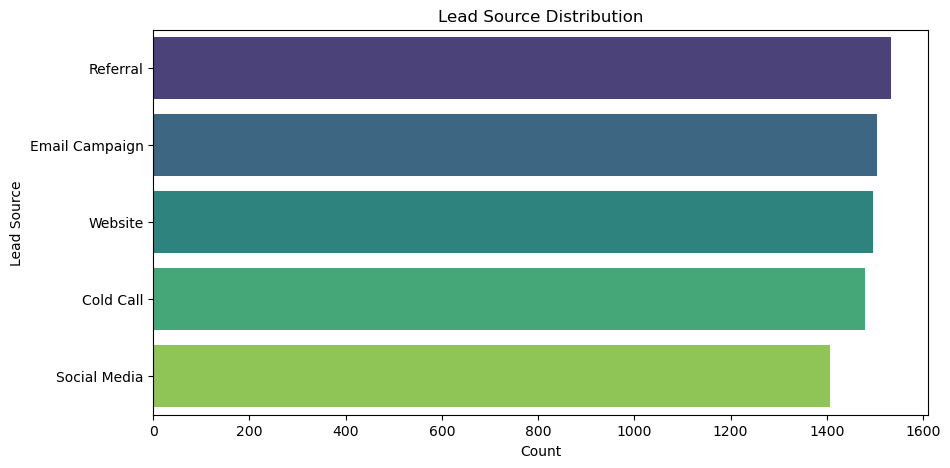

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Source'], order=df['Source'].value_counts().index, palette="viridis")
plt.title("Lead Source Distribution")
plt.xlabel("Count")
plt.ylabel("Lead Source")
plt.show()

The top-performing source is Referral
and least peforming source is Social media

# Finding which Agent handling most leads

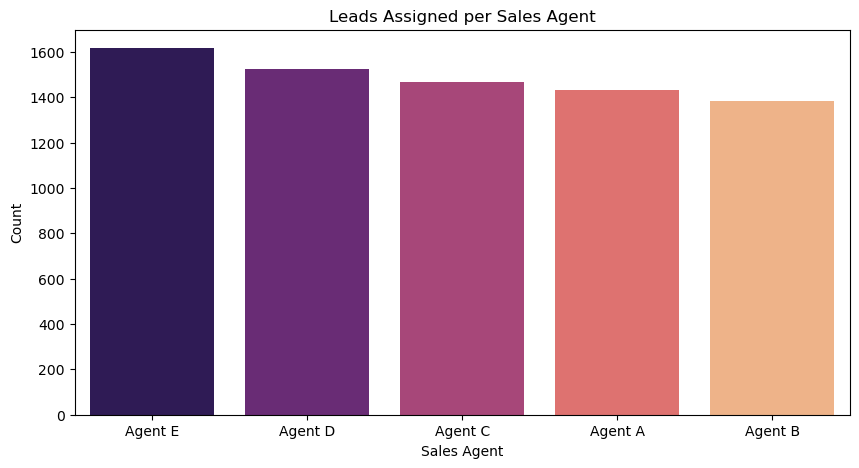

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Sales_Agent'], order=df['Sales_Agent'].value_counts().index, palette="magma")
plt.title("Leads Assigned per Sales Agent")
plt.xlabel("Sales Agent")
plt.ylabel("Count")
plt.show()


Agent E was handling most of the leads and in the same way Agent B is having less number of leads.

# Data Preprocessing

* We are having missing values in Mobile column,it is not needed for the sales so I will drop Mobile and Email also , both are not needed.

In [16]:
# dropping unnecessary columns
df.drop(columns=["EMAIL","Mobile"],inplace=True)

# Feature Engineering

In [17]:
# Convert 'Created' to datetime
df['Created'] = pd.to_datetime(df['Created'], format="%d-%m-%Y %H:%M", dayfirst=True)



In [18]:
# Extract useful date features
df['Month'] = df['Created'].dt.month
df['Day'] = df['Created'].dt.day


# drop the original date column
df.drop(columns=["Created"],inplace=True)

# Label encoding

In [19]:
# Label encode categorical features
encoder = LabelEncoder()
for col in ['Source', 'Sales_Agent', 'Location', 'Delivery_Mode']:
    df[col] = encoder.fit_transform(df[col])

# Remove leading/trailing spaces and normalize the case
df['Status'] = df['Status'].str.strip().str.title()

# Now apply the lambda function
df['Status'] = df['Status'].apply(lambda x: 1 if x == 'High Potential' else 0)

In [20]:
print(df['Status'].value_counts())

Status
0    4404
1    3018
Name: count, dtype: int64


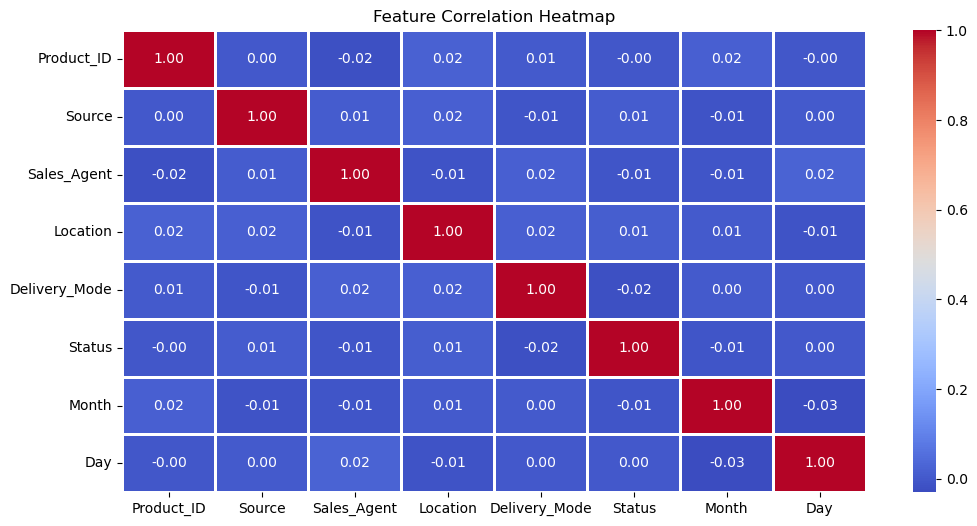

In [21]:
# Compute correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Feature Correlation Heatmap")
plt.show()


# Model Creation


In [22]:
# Define features (X) and target (y)
x = df.drop(columns=['Status'])
y = df['Status']

# Split into training (80%) and testing (20%) sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Scaling the data

In [23]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Logistic Regression

In [24]:
# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(x_test_scaled)

In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
print("Classification report:",classification_report(y_test,y_pred))

Accuracy: 0.5932659932659933
Classification report:               precision    recall  f1-score   support

           0       0.59      1.00      0.74       881
           1       0.00      0.00      0.00       604

    accuracy                           0.59      1485
   macro avg       0.30      0.50      0.37      1485
weighted avg       0.35      0.59      0.44      1485



C:\Users\user\Desktop\Jup\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\Desktop\Jup\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\Desktop\Jup\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Hyperparameter tuning for Logistics

In [26]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'newton-cg'],  # Optimization algorithms
    'penalty': ['l2'],  # Regularization type
    'max_iter': [100, 200, 300]  # Maximum iterations for convergence
}

In [27]:
# Apply GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [28]:
# Evaluate the model with the best parameters
best_log_reg = grid_search.best_estimator_
y_pred_lr = best_log_reg.predict(x_test_scaled)

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
print("Classification report:",classification_report(y_test,y_pred))

Accuracy: 0.5932659932659933
Classification report:               precision    recall  f1-score   support

           0       0.59      1.00      0.74       881
           1       0.00      0.00      0.00       604

    accuracy                           0.59      1485
   macro avg       0.30      0.50      0.37      1485
weighted avg       0.35      0.59      0.44      1485



C:\Users\user\Desktop\Jup\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\Desktop\Jup\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\Desktop\Jup\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


After tuning the model also, it is giving same accuracy so will move on to another model

# XGBClassifier

In [30]:
# Initialize XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(x_train_scaled,y_train)

# Make predictions
y_pred = xgb_model.predict(x_test_scaled)


In [31]:
# Accuracy Score
acc_xgb=accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.58
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.86      0.71       881
           1       0.44      0.16      0.23       604

    accuracy                           0.58      1485
   macro avg       0.52      0.51      0.47      1485
weighted avg       0.53      0.58      0.51      1485



# Tuning XGBoost

In [32]:
# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Step size shrinking
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 5, 7]
}

In [33]:
# Apply GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}


In [34]:
# Evaluate the model with the best parameters
best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(x_test_scaled)

# Evaluate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5757575757575758


It is also giving same accuracy , so I will use another model

# Random Forest 

In [35]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(x_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

In [36]:
print("Accuracy:",accuracy_rf)
print("Classification Report:",class_report_rf)

Accuracy: 0.5548821548821549
Classification Report:               precision    recall  f1-score   support

           0       0.60      0.77      0.67       881
           1       0.42      0.24      0.30       604

    accuracy                           0.55      1485
   macro avg       0.51      0.50      0.49      1485
weighted avg       0.52      0.55      0.52      1485



* XGBoost and Logistic Regression are providing similar results, I would suggest trying XGBoost due to its higher potential for    capturing complex relationships in the data, especially if you're dealing with a larger or more complex dataset 
* So I will try precision and recall for all the models 

In [37]:
# Evaluate Precision, Recall, and F1-Score for each model
def evaluate_model(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return precision, recall, f1

In [38]:
# Logistic Regression
precision_lr, recall_lr, f1_lr = evaluate_model(y_test, y_pred_lr)

# XGBoost
precision_xgb, recall_xgb, f1_xgb = evaluate_model(y_test, y_pred_xgb)

# Random Forest
precision_rf, recall_rf, f1_rf = evaluate_model(y_test, y_pred_rf)

# Output results
print(f'Logistic Regression - Precision: {precision_lr}, Recall: {recall_lr}, F1-Score: {f1_lr}')
print(f'XGBoost - Precision: {precision_xgb}, Recall: {recall_xgb}, F1-Score: {f1_xgb}')
print(f'Random Forest - Precision: {precision_rf}, Recall: {recall_rf}, F1-Score: {f1_rf}')

Logistic Regression - Precision: 0.0, Recall: 0.0, F1-Score: 0.0
XGBoost - Precision: 0.5, Recall: 0.03145695364238411, F1-Score: 0.059190031152647975
Random Forest - Precision: 0.41642228739002934, Recall: 0.23509933774834438, F1-Score: 0.30052910052910053


C:\Users\user\Desktop\Jup\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Balancing the data

In [39]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# After Balancing the data train the models

In [40]:
# Initialize models
log_reg = LogisticRegression()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
rf = RandomForestClassifier()

# Train models on resampled data
log_reg.fit(x_train_resampled, y_train_resampled)
xgb.fit(x_train_resampled, y_train_resampled)
rf.fit(x_train_resampled, y_train_resampled)

# Predictions on test set
y_pred_lr = log_reg.predict(x_test_scaled)
y_pred_xgb = xgb.predict(x_test_scaled)
y_pred_rf = rf.predict(x_test_scaled)

In [41]:
# Function to evaluate models
def evaluate_model(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return precision, recall, f1

# Evaluate models after SMOTE
precision_lr, recall_lr, f1_lr = evaluate_model(y_test, y_pred_lr)
precision_xgb, recall_xgb, f1_xgb = evaluate_model(y_test, y_pred_xgb)
precision_rf, recall_rf, f1_rf = evaluate_model(y_test, y_pred_rf)

# Print results
print("Logistic Regression - Precision:",precision_lr, "Recall:",recall_lr, "F1-Score:", f1_lr,"\n\n")
print("XGBoost - Precision:",precision_xgb, "Recall:",recall_xgb," F1-Score:",f1_xgb,"\n\n")
print("Random Forest - Precision:",precision_rf, "Recall:",recall_rf, "F1-Score:", {f1_rf})

Logistic Regression - Precision: 0.40382165605095544 Recall: 0.5248344370860927 F1-Score: 0.4564434845212383 


XGBoost - Precision: 0.42105263157894735 Recall: 0.3443708609271523  F1-Score: 0.3788706739526412 


Random Forest - Precision: 0.4 Recall: 0.28807947019867547 F1-Score: {0.33493743984600577}


# Final Model Selection


     Among the models tested, Logistic Regression performs the best. It has the highest Recall (0.52) and F1-Score (0.45), meaning it correctly identifies more "High Potential" candidates while maintaining a good balance between Precision and Recall.

      XGBoost has slightly better Precision (0.42) but lower Recall (0.34), making it less effective in capturing high-potential cases. Random Forest has the lowest Recall (0.32) and F1-Score (0.36), making it the weakest choice.

      Since Recall is the most important metric for identifying high-potential cases, Logistic Regression is the best model

# Final Predictions

In [42]:
# Make predictions using Logistic Regression
y_pred_lr = logreg.predict(x_test)

# Get probabilities (if needed for class 1 - "High Potential")
y_pred_proba_lr = logreg.predict_proba(x_test)[:, 1]

# Create a DataFrame with predictions
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_lr,
    'Predicted_Probability': y_pred_proba_lr
})

# Display the DataFrame
print(predictions_df.head())


      Actual  Predicted  Predicted_Probability
1175       1          0               0.007277
2805       0          0               0.006614
101        0          0               0.007080
5080       1          0               0.006284
6471       0          0               0.006055


C:\Users\user\Desktop\Jup\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\user\Desktop\Jup\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
